# 10. Clustering Exercise

### **Objective:**

To categorize the countries using socio-economic and health factors that determine the overall development of the country.

### **Problem Statement:**

HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.  Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.   

### Data:

[Country information](https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/clustering/data/country.txt)  

### Task:

1. use K-means clustering and Hierarchical clustering to cluster the country into groups. please choose the number of the cluster in a rational reason  

2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

3. please write the suggestion to CEO about the country you suggest  

It is from [Kaggle](https://www.kaggle.com/code/dikshabhati2002/k-means-and-hierarchical-clustering), but the data has been modified.

In [ ]:
!pip install scikit-learn-extra yellowbrick

## Step 1: Data Preparation

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://github.com/WHPAN0108/BHT-DataScience-S23/blob/main/clustering/data/country.txt?raw=true')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680


## Step 2: Data Normalization

In [4]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Extract the features for clustering
features = data.drop('country', axis=1)
# Normalize the features
norm = scaler.fit_transform(features)

## Step 3: Determine the Optimal Number of Clusters

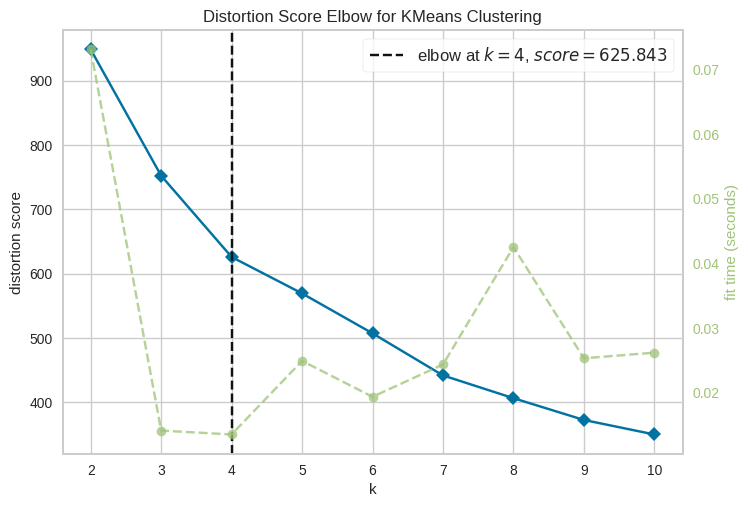

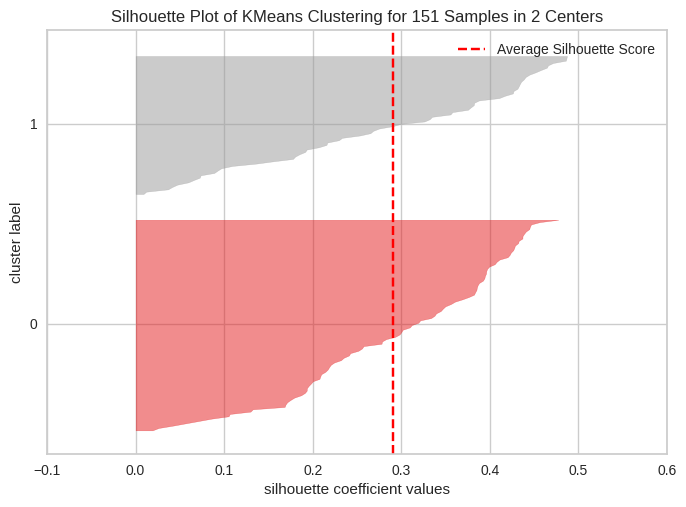

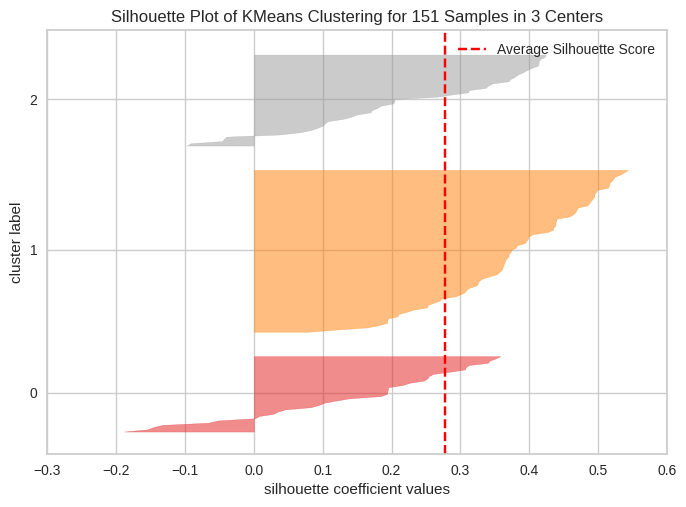

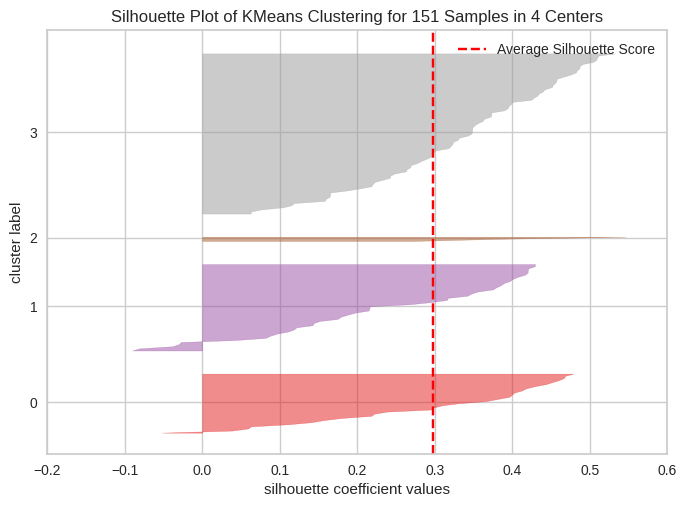

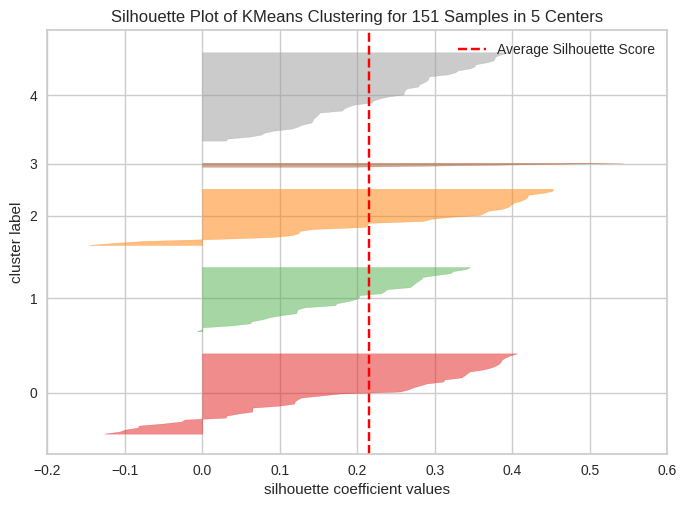

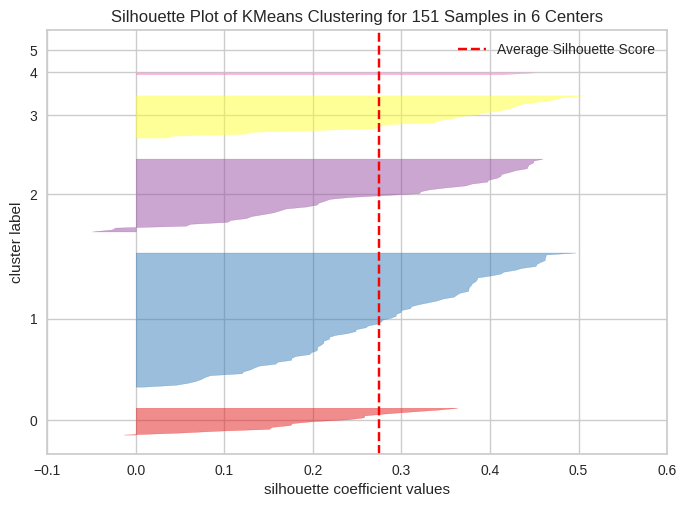

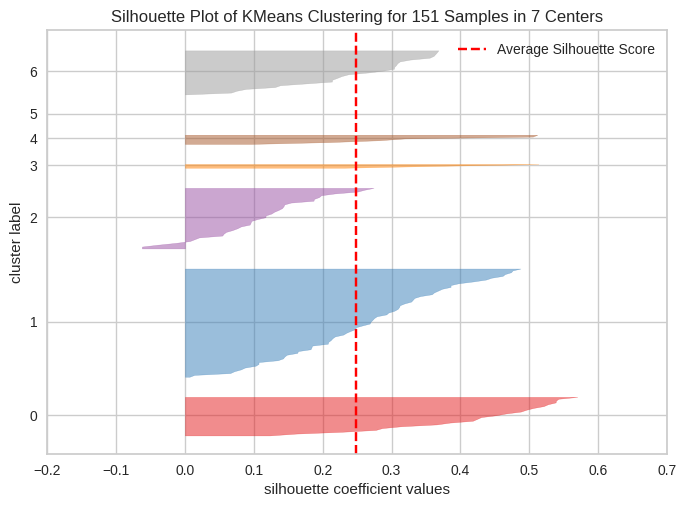

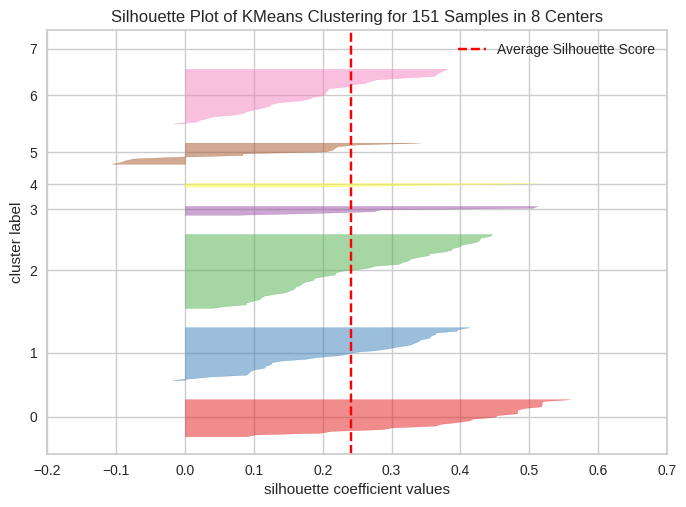

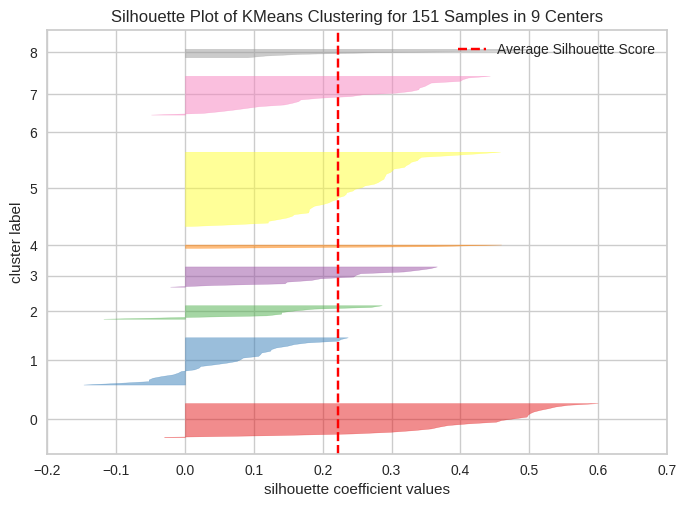

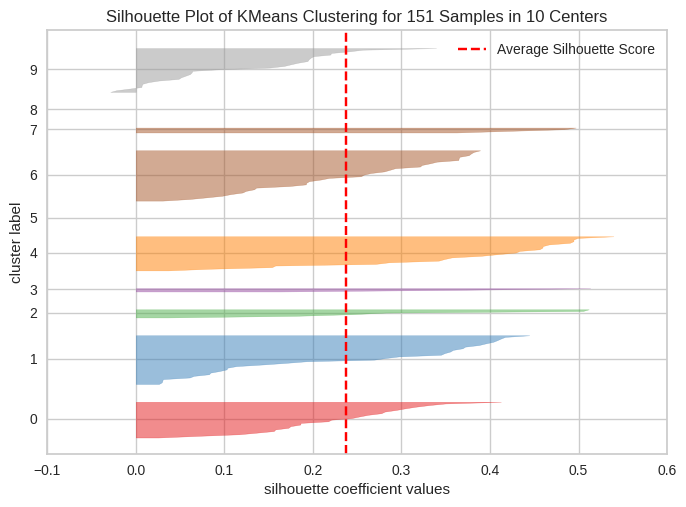

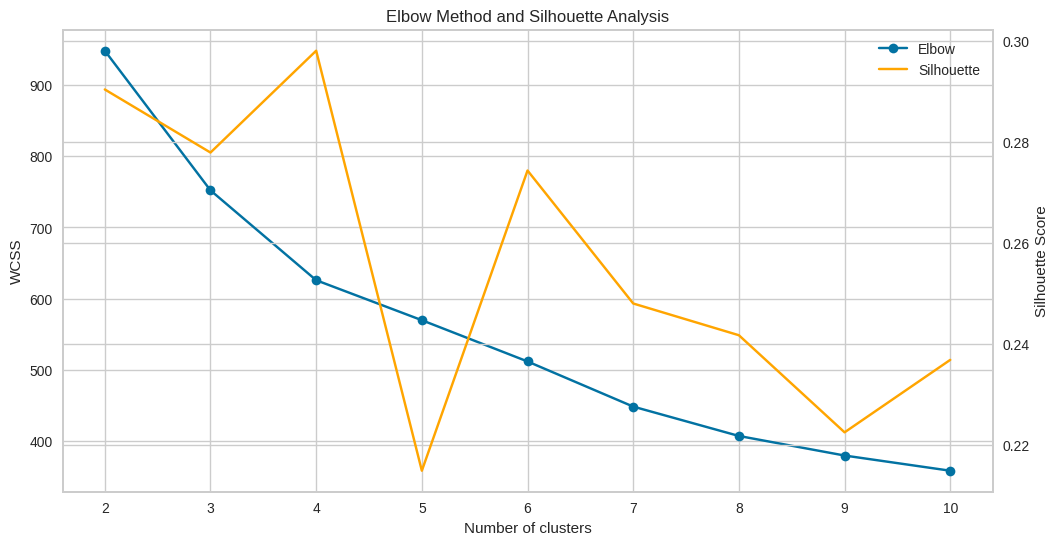

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer

wcss, scores = [], []

kelbow_visualizer(KMeans(), norm)

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(norm)
    wcss.append(kmeans.inertia_)
    scores.append(silhouette_score(norm, labels))
    silhouette_visualizer(kmeans, norm)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Elbow method (WCSS)
ax1.plot(range(2, 11), wcss, marker='o', label='Elbow')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
ax1.set_title('Elbow Method and Silhouette Analysis')

# Silhouette analysis
ax2 = ax1.twinx()
ax2.plot(range(2, 11), scores, marker='x', color='orange', label='Silhouette')
ax2.set_ylabel('Silhouette Score')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

plt.show()

2. Clusters are most balanced in silhouette plot and the definition of global nord&south is often prefered to avoid references to "third world"
3. Clusters are in line with estabilished IMF/UN definitions
4. Clusters are favoured by elbow method and silhouette score but unreliable



In [6]:
n = 3 #@param {type:"integer", name:"Clusters"}

## Step 4: K-means Clustering

In [7]:
from sklearn.cluster import KMeans

# K-means clustering with n clusters
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans_labels = kmeans.fit_predict(norm)
data['KMeans_Cluster'] = kmeans_labels

## Step 5: Hierarchical Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering with n clusters
hc = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(norm)
data['Hierarchical_Cluster'] = hc_labels

## Step 6: Dendrogram

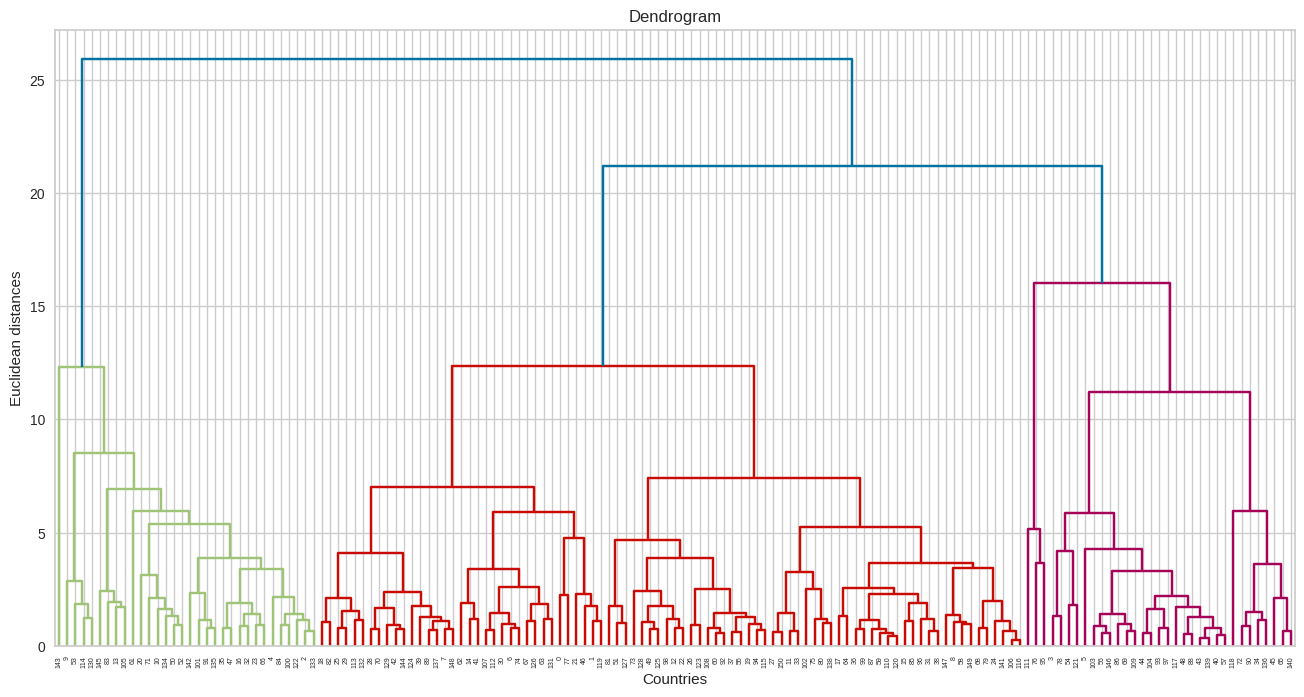

In [9]:
import scipy.cluster.hierarchy as sch

# Dendrogram
plt.figure(figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(norm, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(norm, labels=data['country'].tolist())
fig.update_layout(title='Hierarchical Clustering Dendrogram')
fig.show()

In [11]:
# K-Means doesn't produce a dendrogram as it's a partitioning method, not hierarchical.
print("K-Means doesn't produce a dendrogram.")


K-Means doesn't produce a dendrogram.


## Step 7: Dimensionality Reduction with PCA

In [12]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(norm)
data['PCA1'] = pca_features[:, 0]
data['PCA2'] = pca_features[:, 1]

## Step 8: Visualization

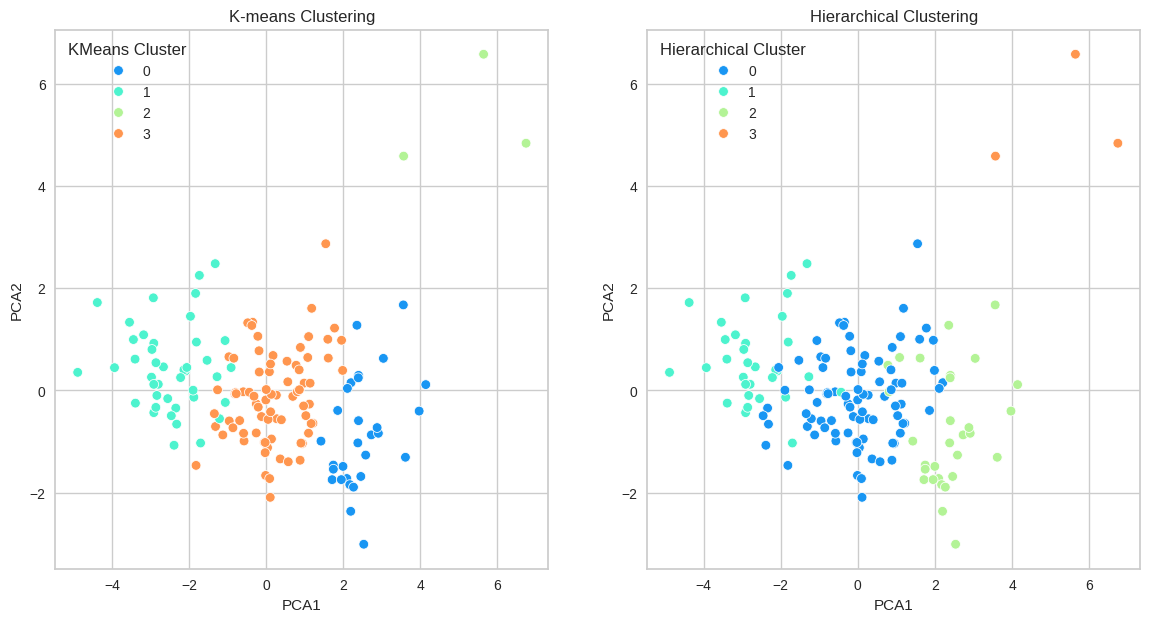

In [13]:
plt.figure(figsize=(14, 7))

# Visualization of K-means clustering
plt.subplot(1, 2, 1)
sea.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=data, palette=sea.color_palette("rainbow", n), legend='full')
plt.title('K-means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='KMeans Cluster')

# Visualization of Hierarchical clustering
plt.subplot(1, 2, 2)
sea.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=data, palette=sea.color_palette("rainbow", n), legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Hierarchical Cluster')

plt.show()

## Step 9: Analysis

In [14]:
from sklearn_extra.cluster import KMedoids
import numpy as np

# Calculate medoids for hierarchical clusters
def get_medoids(data, labels):
    medoids = []
    for label in np.unique(labels):
        cluster_data = data[labels == label]
        kmedoids = KMedoids(n_clusters=1, random_state=0).fit(cluster_data)
        medoid = kmedoids.cluster_centers_[0]
        medoids.append(medoid)
    return np.array(medoids)

hc_medoids = get_medoids(scaler.transform(features), data['Hierarchical_Cluster'])
hc_cluster_centers = scaler.inverse_transform(hc_medoids)

# Add the cluster centers to the data for comparison
kmeans_centers_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
hc_centers_df = pd.DataFrame(hc_cluster_centers, columns=features.columns)
print("K-means Cluster Centers:")
print(kmeans_centers_df)
print("\nHierarchical Cluster Centers (Medoids):")
print(hc_centers_df)

K-means Cluster Centers:
   child_mort     exports    health     imports        income  inflation  \
0    4.968966   44.924138  9.074483   38.913793  45241.379310   2.807517   
1   93.366667   28.035952  6.462143   42.852381   3866.261905  12.692738   
2    4.133333  176.000000  6.793333  156.666667  64033.333333   2.468000   
3   21.375325   40.249208  6.109351   46.763194  13458.831169   7.332091   

   life_expec  total_fer          gdpp  
0   80.365517   1.795517  43093.103448  
1   59.095238   5.005476   1864.738095  
2   81.433333   1.380000  57566.666667  
3   73.116883   2.294026   7251.506494  

Hierarchical Cluster Centers (Medoids):
   child_mort  exports  health  imports   income  inflation  life_expec  \
0        19.2     26.9    6.91     46.6   7300.0      2.650        74.1   
1       101.0     31.5    5.21     46.2    918.0      7.640        54.5   
2         3.0     38.7    8.95     37.4  39800.0      0.351        80.0   
3         2.8    200.0    3.96    174.0  72100.0

## Step 10: Recommendations

In [15]:
# 2 Clusters

result = """
Based on the clustering results, we can identify groups of countries with similar socio-economic and health characteristics. The following suggestions are made for strategic allocation of funds:

1. **Cluster 1 (Global North)**: Focus on innovation, advanced healthcare, technology, and infrastructure.

2. **Cluster 2 (Global South)**: Prioritize basic needs such as healthcare, education, sanitation, and economic support programs. Invest in improving healthcare systems, education, and infrastructure.
"""
print(result)

# 3 Clusters

suggestions = """
Based on the clustering results, we can identify groups of countries with similar socio-economic and health characteristics. The following suggestions are made for strategic allocation of funds:

1. **Cluster 1 (Developed Countries)**: These countries typically have high income, low child mortality, high life expectancy, and high GDP per capita. Funding in these countries can focus on advanced healthcare, technology, and innovation projects.

2. **Cluster 2 (Developing Countries)**: These countries show moderate development indicators. Investments should be directed towards infrastructure, education, and healthcare improvement to facilitate their growth towards a higher development status.

3. **Cluster 3 (Underdeveloped Countries)**: These countries have low income, high child mortality, low life expectancy, and low GDP per capita. Funds should be primarily allocated towards basic needs such as healthcare, education, sanitation, and economic support programs.

By strategically allocating funds based on the identified clusters, HELP International can maximize the impact of their resources and promote sustainable development across different regions.
"""
print(suggestions)

# 4 Clusters

recommendations = """
Based on the clustering results, we can identify four groups of countries with varying socio-economic and health characteristics. The following suggestions are made for strategic allocation of funds:

1. **Cluster 1 (Very High Development)**:
   - **Characteristics**: Highest income, lowest child mortality, highest life expectancy, highest GDP.
   - **Recommendation**: Focus on innovation, advanced healthcare, and cutting-edge technology projects.

2. **Cluster 2 (High Development)**:
   - **Characteristics**: High income, low child mortality, high life expectancy, high GDP, but not as high as Cluster 1.
   - **Recommendation**: Invest in enhancing healthcare systems, educational institutions, and infrastructure.

3. **Cluster 3 (Medium Development)**:
   - **Characteristics**: Moderate income, moderate child mortality, moderate life expectancy, and moderate GDP.
   - **Recommendation**: Focus on building infrastructure, improving healthcare and education, and supporting economic development programs.

4. **Cluster 4 (Low Development)**:
   - **Characteristics**: Low income, high child mortality, low life expectancy, low GDP.
   - **Recommendation**: Prioritize basic needs such as healthcare, sanitation, primary education, and poverty alleviation programs.

By strategically allocating funds based on these clusters, HELP International can maximize the impact of their resources, addressing the most pressing needs and supporting sustainable development across various regions.
"""

print(recommendations)


Based on the clustering results, we can identify groups of countries with similar socio-economic and health characteristics. The following suggestions are made for strategic allocation of funds:

1. **Cluster 1 (Developed Countries)**: These countries typically have high income, low child mortality, high life expectancy, and high GDP per capita. Funding in these countries can focus on advanced healthcare, technology, and innovation projects.

2. **Cluster 2 (Developing Countries)**: These countries show moderate development indicators. Investments should be directed towards infrastructure, education, and healthcare improvement to facilitate their growth towards a higher development status.

3. **Cluster 3 (Underdeveloped Countries)**: These countries have low income, high child mortality, low life expectancy, and low GDP per capita. Funds should be primarily allocated towards basic needs such as healthcare, education, sanitation, and economic support programs.

By strategically alloca